# Projet Fil Rouge
### Nom, Prénom, Année

## Data Cleaning

In [2]:
# Ici, vous réaliserez le cleaning de votre jeu de données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('./data/anxiety_attack_dataset.csv')
df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [3]:
df.isna().any()

ID                                   False
Age                                  False
Gender                               False
Occupation                           False
Sleep Hours                          False
Physical Activity (hrs/week)         False
Caffeine Intake (mg/day)             False
Alcohol Consumption (drinks/week)    False
Smoking                              False
Family History of Anxiety            False
Stress Level (1-10)                  False
Heart Rate (bpm during attack)       False
Breathing Rate (breaths/min)         False
Sweating Level (1-5)                 False
Dizziness                            False
Medication                           False
Therapy Sessions (per month)         False
Recent Major Life Event              False
Diet Quality (1-10)                  False
Severity of Anxiety Attack (1-10)    False
dtype: bool

In [17]:
#df.info() => 20 colonnes.
try :
    df.drop(columns='ID', inplace=True)
except KeyError as message:
    print('l\'index a déjà été effacé')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                12000 non-null  int64  
 1   Gender                             12000 non-null  object 
 2   Occupation                         12000 non-null  object 
 3   Sleep Hours                        12000 non-null  float64
 4   Physical Activity (hrs/week)       12000 non-null  float64
 5   Caffeine Intake (mg/day)           12000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 7   Smoking                            12000 non-null  object 
 8   Family History of Anxiety          12000 non-null  object 
 9   Stress Level (1-10)                12000 non-null  int64  
 10  Heart Rate (bpm during attack)     12000 non-null  int64  
 11  Breathing Rate (breaths/min)       12000 non-null  int

In [18]:
#Columns renaming
new_col_names = {
    'Age'                               : 'age',
    'Gender'                            : 'gender',
    'Occupation'                        : 'occupation',
    'Sleep Hours'                       : 'sleep_hours',
    'Physical Activity (hrs/week)'      : 'physical_activity',
    'Caffeine Intake (mg/day)'          : 'caffeine_intake',
    'Alcohol Consumption (drinks/week)' : 'alcohol_consuption',
    'Smoking'                           : 'smoking',
    'Family History of Anxiety'         : 'family_history',
    'Stress Level (1-10)'               : 'stress_level',
    'Heart Rate (bpm during attack)'    : 'heart_rate_during_attack',
    'Breathing Rate (breaths/min)'      : 'breathing_rate',
    'Sweating Level (1-5)'              : 'sweating_level',
    'Dizziness'                         : 'dizziness',
    'Medication'                        : 'medication',
    'Therapy Sessions (per month)'      : 'therapy_session',
    'Recent Major Life Event'           : 'recent_life_event',
    'Diet Quality (1-10)'               : 'diet_quality',
    'Severity of Anxiety Attack (1-10)' : 'attack_severity'
}

df = df.rename(columns=new_col_names)

In [19]:
genders = df['gender'].value_counts()
genders

gender
Female    5809
Male      5723
Other      468
Name: count, dtype: int64

In [20]:
df = pd.get_dummies(df, columns=['gender'])
df = pd.get_dummies(df, columns=['occupation'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       12000 non-null  int64  
 1   sleep_hours               12000 non-null  float64
 2   physical_activity         12000 non-null  float64
 3   caffeine_intake           12000 non-null  int64  
 4   alcohol_consuption        12000 non-null  int64  
 5   smoking                   12000 non-null  object 
 6   family_history            12000 non-null  object 
 7   stress_level              12000 non-null  int64  
 8   heart_rate_during_attack  12000 non-null  int64  
 9   breathing_rate            12000 non-null  int64  
 10  sweating_level            12000 non-null  int64  
 11  dizziness                 12000 non-null  object 
 12  medication                12000 non-null  object 
 13  therapy_session           12000 non-null  int64  
 14  recent

In [22]:
df['smoking'] = df['smoking'].map({'Yes': True, 'No': False})
df['family_history'] = df['family_history'].map({'Yes': True, 'No': False})
df['medication'] = df['medication'].map({'Yes': True, 'No': False})
df['dizziness'] = df['dizziness'].map({'Yes': True, 'No': False})
df['recent_life_event'] = df['recent_life_event'].map({'Yes': True, 'No': False})

In [25]:
df.head()

,age,sleep_hours,physical_activity,caffeine_intake,alcohol_consuption,smoking,family_history,stress_level,heart_rate_during_attack,breathing_rate,...,attack_severity,gender_Female,gender_Male,gender_Other,occupation_Doctor,occupation_Engineer,occupation_Other,occupation_Student,occupation_Teacher,occupation_Unemployed
0,56,9.6,8.3,175,6,False,False,4,145,33,...,10,True,False,False,False,False,True,False,False,False
1,46,6.4,7.3,97,6,False,False,3,143,18,...,8,False,True,False,False,False,False,False,True,False
2,32,6.9,1.0,467,14,False,False,2,60,34,...,5,True,False,False,True,False,False,False,False,False
3,60,9.2,3.7,471,16,False,True,6,94,19,...,8,False,True,False,True,False,False,False,False,False
4,25,9.2,2.5,364,2,False,True,7,152,15,...,1,False,True,False,False,False,False,True,False,False


In [4]:
df.to_csv('./data/clean_data.csv', index=False)

NameError: name 'df' is not defined

## Data Visualisation
Ici, vous réaliserez vos observations, créerez vos graphes dans un premier temps. Une fois qu'ils seront fait, ils seront à intégrer à votre application Streamlit. Considérez donc cet espace comme un bac à sable avant de vous lancer dans le développement de l'application de Data Visualisation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('./data/clean_data.csv')

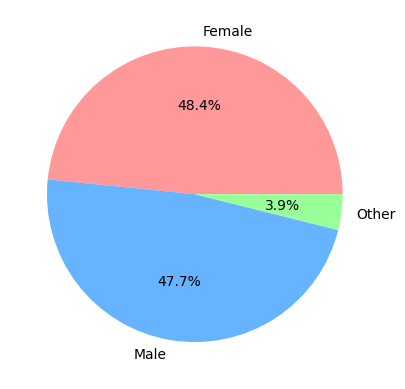

In [ ]:
# Ici, vous réaliserez la visualisation de votre jeu de données
#1- proportion d'hommes et de femmes :
gender_count = df[['gender_Female', 'gender_Male', 'gender_Other']].sum()
plt.figure()
# Labels et couleurs
labels = ['Female', 'Male', 'Other']
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(gender_count, labels=labels, colors=colors, autopct='%1.1f%%',)
plt.show()

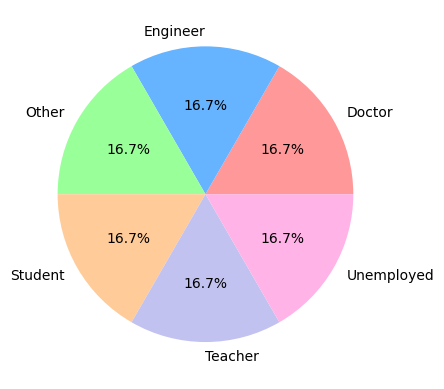

In [23]:
#1- distribution en fonction des métiers :
gender_count = df[['occupation_Doctor', 'occupation_Engineer', 'occupation_Other', 'occupation_Student', 'occupation_Teacher', 'occupation_Unemployed']].count()
plt.figure()
# Labels et couleurs
labels = ['Doctor', 'Engineer', 'Other', 'Student', 'Teacher', 'Unemployed' ]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
plt.pie(gender_count, labels=labels, colors=colors, autopct='%1.1f%%',)
plt.show()

In [22]:
#min : 18
#max : 64

tranches = ((11, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 70))
df_tranches = pd.DataFrame()
for tranche in tranches:
    df_tranches[f'{tranche[0]}-{tranche[1]}'] = [df['age'][(tranche[0] < df['age']) & (df['age'] < tranche[1])].count()]

df_tranches

,11-20,21-30,31-40,41-50,51-60,61-70
0,510,1982,2103,2059,2017,768


In [27]:
df['sleep_hours'].mean()

np.float64(6.4826500000000005)

([<matplotlib.patches.Wedge at 0x1e77ae8aa50>,
 [Text(0.6479608587449998, 0.8889019774612062, ''),
  Text(-0.6479609929654568, -0.8889018796218284, '')],
 [Text(0.3534331956790907, 0.4848556240697488, '29.9%'),
  Text(-0.3534332688902491, -0.48485557070281543, '70.1%')])

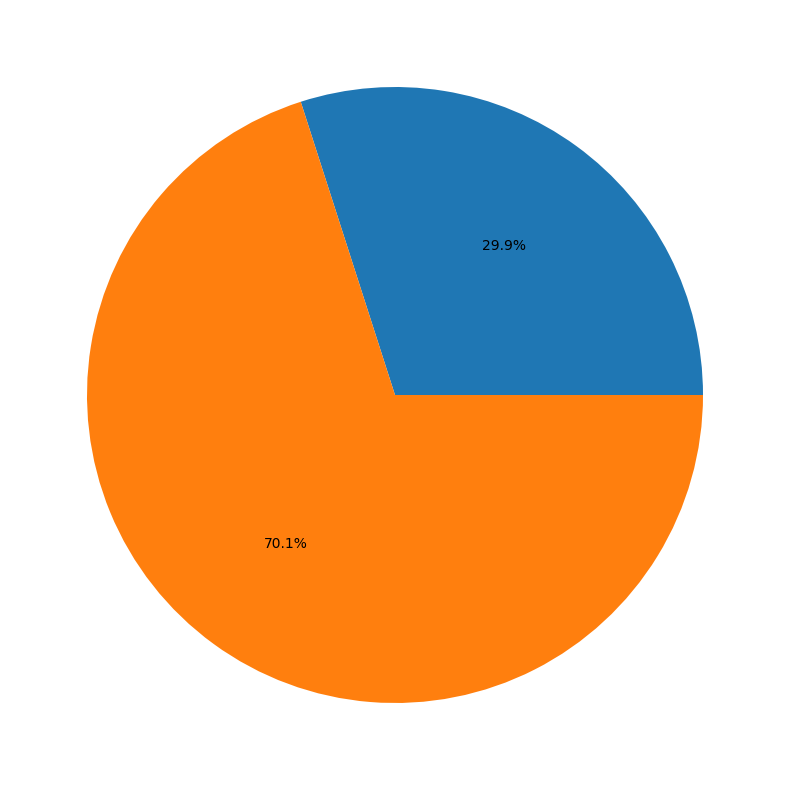

In [ ]:
# family_history,stress_level,dizziness,medication,therapy_session,recent_life_event,diet_quality,attack_severity


df_dizziness = pd.DataFrame(
    {'count' : [
        df[df['dizziness']]['dizziness'].sum(),
        df.shape[0]-df[df['dizziness']]['dizziness'].sum()]
    },
    index=['yes', 'no'])

plt.figure(figsize=(10, 10))
plt.pie(df_dizziness['count'], autopct='%1.1f%%')


# plt.pie(df_dizziness, autopct='%1.1f%%',)


In [7]:
df[df['dizziness']]['dizziness'].sum()

np.int64(3594)

In [11]:
    # diet_quality

In [13]:
df['diet_quality'].max()


np.int64(10)

In [ ]:
#conso café  / gravité de la crise. Correllation ?

#1- ordonner par conso café et calculer la moyenne de gravité de la crise:

df_coffee_crisis_severity = df.groupby(by=['caffeine_intake'], as_index=False)['attack_severity'].mean()

<BarContainer object of 500 artists>

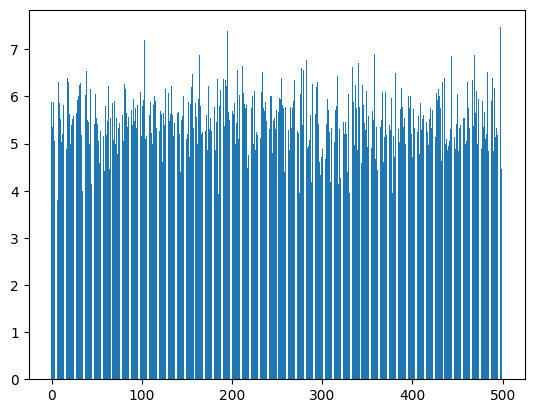

In [ ]:
plt.figure()
plt.bar(df_coffee_crisis_severity['caffeine_intake'], df_coffee_crisis_severity['attack_severity'])

<BarContainer object of 500 artists>

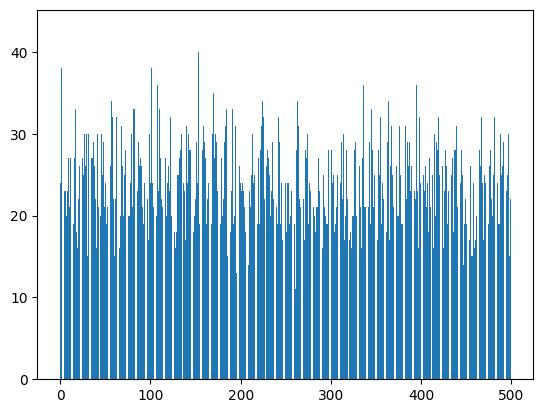

In [89]:
#conso café  / nombre de crise. Correllation ?

df_coffee_attack_nb = df['caffeine_intake'].value_counts().reset_index()
df_coffee_attack_nb.columns = ['caffeine_intake', 'nb de cas']
plt.figure()
plt.bar(df_coffee_attack_nb['caffeine_intake'], df_coffee_attack_nb['nb de cas'])

In [64]:
#le sexe agrave-t-il la crise ?
df_gender = pd.DataFrame({
    'Gender': ['Female', 'Male', 'Other'],
    'Attack_Severity_Mean': [
        df.loc[df['gender_Female'], 'attack_severity'].mean(),
        df.loc[df['gender_Male'], 'attack_severity'].mean(),
        df.loc[df['gender_Other'], 'attack_severity'].mean()
    ]
})

df_gender.head()

,Gender,Attack_Severity_Mean
0,Female,5.476158
1,Male,5.532238
2,Other,5.596154


Text(0.5, 1.0, 'Impact du genre sur la sévérité des attaques')

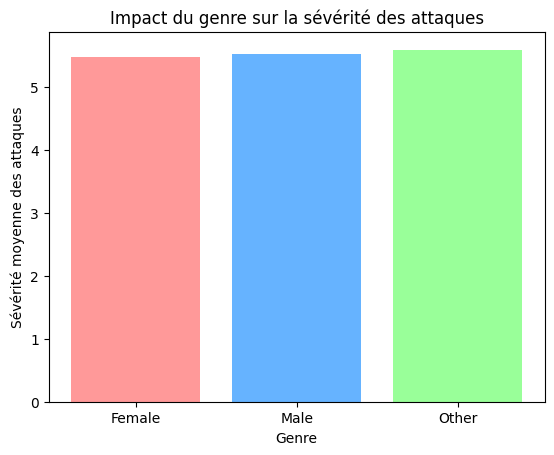

In [78]:
plt.figure()
plt.bar(df_gender['Gender'], df_gender['Attack_Severity_Mean'], color=['#ff9999', '#66b3ff', '#99ff99'])
plt.xlabel('Genre')
plt.ylabel('Sévérité moyenne des attaques')
plt.title('Impact du genre sur la sévérité des attaques')

In [71]:
#la consomation d'alcool ?
df_alcohol = df.groupby(by=['alcohol_consuption'], as_index=False)['attack_severity'].mean()
df_alcohol.head()

,alcohol_consuption,attack_severity
0,0,5.435772
1,1,5.321489
2,2,5.434028
3,3,5.539543
4,4,5.289922


Text(0, 0.5, 'gravité de la crise')

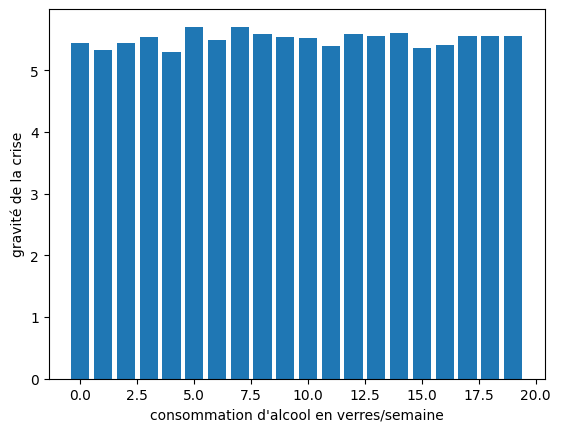

In [80]:
plt.figure()
plt.bar(df_alcohol['alcohol_consuption'], df_alcohol['attack_severity'])
plt.xlabel('consommation d\'alcool en verres/semaine')
plt.ylabel('gravité de la crise')

<BarContainer object of 20 artists>

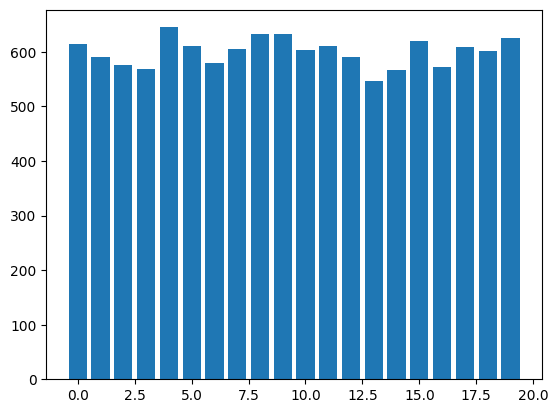

In [92]:
#conso alcool/ nb de crise : corellation ?

df_alcohol_attack_nb = df['alcohol_consuption'].value_counts().reset_index()
df_alcohol_attack_nb.columns = ['alcohol_consuption', 'nb de cas']
plt.figure()
plt.bar(df_alcohol_attack_nb['alcohol_consuption'], df_alcohol_attack_nb['nb de cas'])

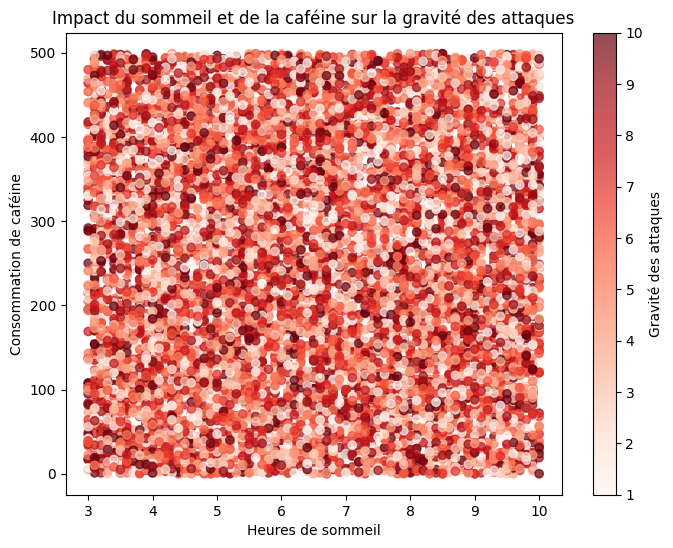

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["sleep_hours"], df["caffeine_intake"], c=df["attack_severity"], cmap="Reds", alpha=0.7)
plt.colorbar(label="Gravité des attaques")  
plt.xlabel("Heures de sommeil")
plt.ylabel("Consommation de caféine")
plt.title("Impact du sommeil et de la caféine sur la gravité des attaques")
plt.show()
#distribution homogène...

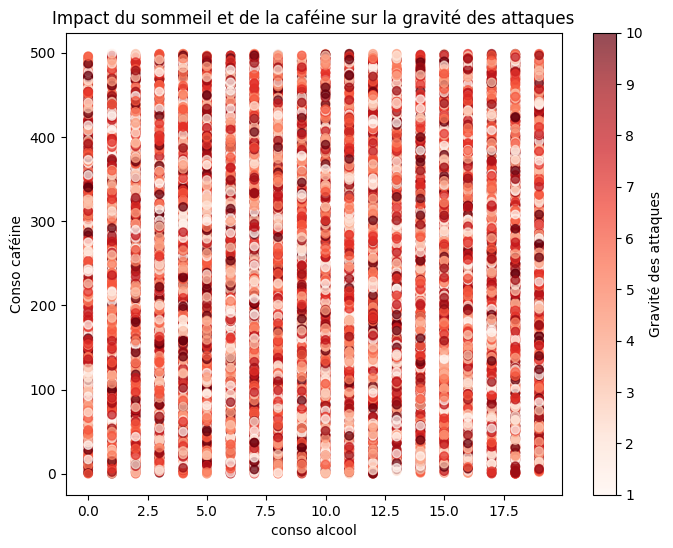

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["alcohol_consuption"], df["caffeine_intake"], c=df["attack_severity"], cmap="Reds", alpha=0.7)
plt.colorbar(label="Gravité des attaques")  
plt.xlabel("conso alcool")
plt.ylabel("Conso caféine")
plt.title("Impact de la conso d'alcool et de caféine sur la gravité des attaques")
plt.show()
#C'est homogène aussi


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["alcohol_consuption"], df["caffeine_intake"], c=df["attack_severity"], cmap="Reds", alpha=0.7)
plt.colorbar(label="Gravité des attaques")  
plt.xlabel("conso alcool")
plt.ylabel("Conso caféine")
plt.title("Impact de la conso d'alcool et de caféine sur la gravité des attaques")
plt.show()

In [7]:
import mariadb
import sys

# Connect to MariaDB Platform
try:
    conn = mariadb.connect(
        user="Raffi",
        password="dcba",
        host="192.168.1.2",
        port=3307,
        database="test"
    )
except mariadb.Error as e:
    print(f"Error connecting to MariaDB Platform: {e}")
    sys.exit(1)

# Get Cursor
cur = conn.cursor()

In [21]:
cur.execute("""CREATE TABLE IF NOT EXISTS users (
            id INT AUTO_INCREMENT PRIMARY KEY,
            username VARCHAR(50) NOT NULL UNIQUE,
            email VARCHAR(100) NOT NULL UNIQUE,
            password_hash VARCHAR(255) NOT NULL,
            created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP);
            """)

cur.execute("""INSERT INTO users (username, email, password_hash) VALUES ('Raffi', 'raffi@admin.com', 'admin');

""")

In [22]:
cur.execute("""SELECT * FROM users""")
for line in cur.fetchall():
    print(line)

(1, 'Raffi', 'raffi@admin.com', 'admin', datetime.datetime(2025, 3, 14, 9, 37, 13))


In [23]:
cur.close()  # Fermer le curseur (optionnel mais recommandé)
conn.close()  # Fermer la connexion (obligatoire)

In [26]:
import sqlite3

# Connexion à la base de données
db = sqlite3.connect("project.db")
cur = db.cursor()

# Exécuter une requête
cur.execute("SELECT * FROM users")

# Récupérer et afficher les résultats
for line in cur.fetchall():
    print(line)

# Fermer proprement le curseur et la connexion
cur.close()
db.close()





(1, 'admin', 'admin')
(2, 'matis@datarockstars.ai', '0928bf60b12f7ab0312441e42e7cae5509f8675dfd23248461cb099e84b522a5')
(3, 'bilel.ouahmed1@gmail.com', 'c97988de6aaffd6d65178ad921954c153e03ce2db31ecbe08b71f9ee2422581d')
(4, 'raffi', '1155d25c69515ca1a01464d04a5696c4f0d0d6ca90c131b2d9ee9178f282fe17')
(5, 'tonton', '31606f3a7a5ffdd7a923d6231b58b24913ad18ca8b5849a2019a2072c5e084e3')


In [14]:
import numpy as np

tableau = np.array([1, 2, 3, 4])
tableau

array([1, 2, 3, 4])

In [7]:
tableau += tableau[-1]
tableau

array([ 7,  8,  9, 10])

In [16]:
tableau = np.append(tableau, tableau[0])
min(tableau)

np.int64(1)

In [20]:
string = "no smok"
print(string.startswith('no p'))

False


In [10]:
import re

mail_regex = r'^(([^<>()[\]\\.,;:\s@"]+(\.[^<>()[\]\\.,;:\s@"]+)*)|(".+"))@' \
               r'((\[[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\])|' \
               r'(([a-zA-Z\-0-9]+\.)+[a-zA-Z]{2,}))$'

print(isinstance(re.fullmatch(mail_regex, "a@b.com"), re.Match))

True


In [14]:
passwd_regex = r'^(?=.*[a-z])(?=.*[A-Z])(?=.*[0-9])(?=.*[^A-Za-z0-9]).{8,22}$'
print(isinstance(re.fullmatch(passwd_regex, "a1é3@b.fgjhdfjfdjfdjfdjffjcMom"), re.Match))

False


In [19]:
from email.utils import parseaddr
nom, adresse = parseaddr("a@b.cfgfdgdfg")
print(parseaddr("a@b.c"))
print('@' in adresse and '.' in adresse.split('@')[-1])

('', 'a@b.c')
True
